In [39]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import scipy
import math

In [2]:
ad = np.load("data/AD_EEG_sub_001_processed.npy")
control = np.load("data/Control_EEG_sub_037_processed.npy")

This work is curated from the [COGS118C Data Curation Notebook][notebook].

[notebook]: https://github.com/hengxu19/COGS118C/blob/master/Final_Project_Data/data_curation.ipynb


[^1]: https://github.com/hengxu19/COGS118C/blob/master/Final_Project_Data/data_curation.ipynb  

The original study, *Dataset of Scalp EEG Recordings of Alzheimer’s Disease, Frontotemporal Dementia and Healthy Subjects from Routine EEG* by Miltiadous et al. (2023), can be accessed [here](https://www.mdpi.com/2306-5729/8/6/95).

[^2]: https://www.mdpi.com/2306-5729/8/6/95

In [3]:
control.shape

(3, 150000)

Let's split the dataset according to the channels: Fp1, Fp2, and Fp3.

In [4]:
ad_channel_1 = ad[0, :]
control_channel_1 = control[0, :]
ad_channel_2 = ad[1, :]
control_channel_2 = control[1, :]
ad_channel_3 = ad[2, :]
control_channel_3 = control[2, :]

In [5]:
fs = 500 # Sampling rate (Hz)
nperseg = 1024 # Spacing frequency between bins

I decided to choose a nperseg of 1024 because it offers a frequency resolution of 500 / 1024 = 0.49. I deemed it the most suitable choice for nperseg considering the tradeoff of other values like 512, 2048, or even 4096, and given that the entire EEG recording is 5 minutes long.

In [6]:
fp1_control, fp1_psd_control = scipy.signal.welch(control_channel_1, fs=fs, nperseg=nperseg)
fp1_ad, fp1_psd_ad = scipy.signal.welch(ad_channel_1, fs=fs, nperseg=nperseg)

In the original study, the researchers applied a "Butterworth band-pass filter with a frequency range of 0.5 to 45 Hz" to preprocess the data. As such, we will limit the frequency range to these values (Miltiadous, 2023).

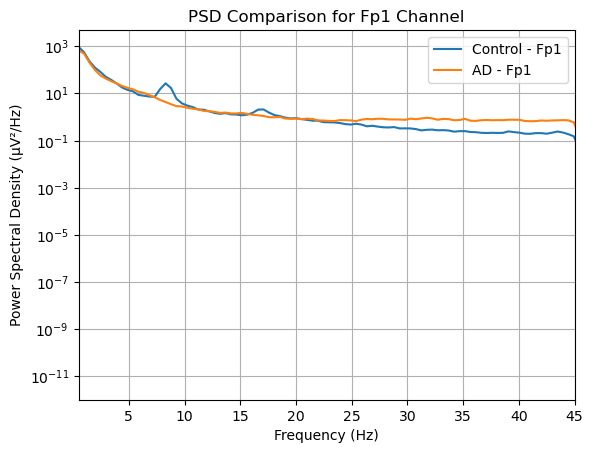

In [7]:
plt.semilogy(fp1_control, fp1_psd_control, label='Control - Fp1')
plt.semilogy(fp1_ad, fp1_psd_ad, label='AD - Fp1')
plt.xlim(0.5, 45)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (µV²/Hz)')
plt.title('PSD Comparison for Fp1 Channel')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
fp2_control, fp2_psd_control = scipy.signal.welch(control_channel_2, fs=fs, nperseg=nperseg)
fp2_ad, fp2_psd_ad = scipy.signal.welch(ad_channel_2, fs=fs, nperseg=nperseg)

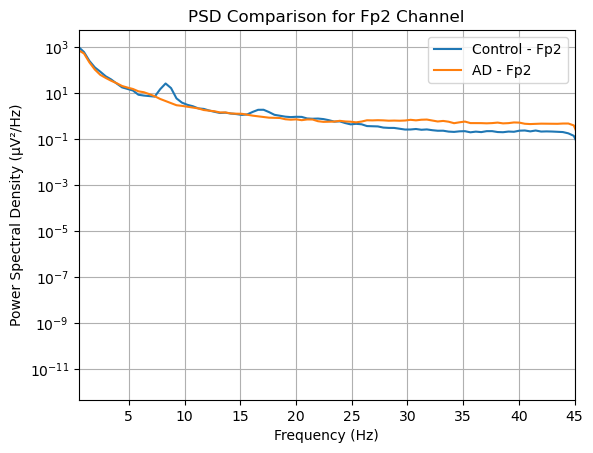

In [9]:
plt.semilogy(fp2_control, fp2_psd_control, label='Control - Fp2')
plt.semilogy(fp2_ad, fp2_psd_ad, label='AD - Fp2')
plt.xlim(0.5, 45)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (µV²/Hz)')
plt.title('PSD Comparison for Fp2 Channel')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
fp3_control, fp3_psd_control = scipy.signal.welch(control_channel_3, fs=fs, nperseg=nperseg)
fp3_ad, fp3_psd_ad = scipy.signal.welch(ad_channel_3, fs=fs, nperseg=nperseg)

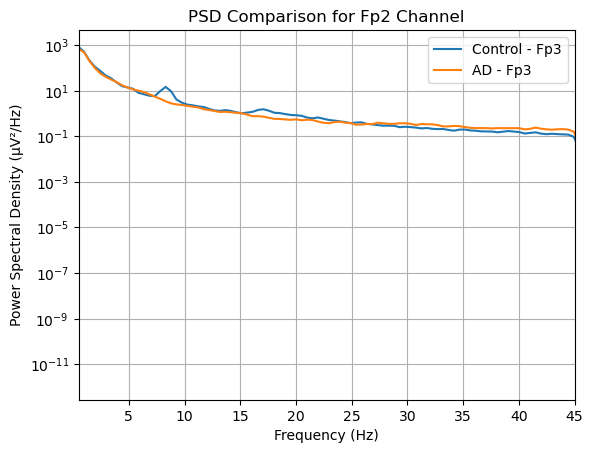

In [11]:
plt.semilogy(fp3_control, fp3_psd_control, label='Control - Fp3')
plt.semilogy(fp3_ad, fp3_psd_ad, label='AD - Fp3')
plt.xlim(0.5, 45)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (µV²/Hz)')
plt.title('PSD Comparison for Fp2 Channel')
plt.legend()
plt.grid(True)
plt.show()

In the final edition of this notebook, we decided, after recognizing the different frequency bands in the above image, that we could label them so it's easier to discern the difference between the two groups in each channel.

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = fp1_control,
    y = fp1_psd_control,
    mode = 'lines',
    name = 'Control - Fp1',
    line = dict(color = "blue", 
                width = 2)
))
fig.add_trace(go.Scatter(
    x = fp1_ad,
    y = fp1_psd_ad,
    mode = 'lines',
    name = 'AD - Fp1',
    line = dict(color = "deeppink", 
                width = 2)
))

# colors for EEG frequency bands
shapes = [
    # delta
    dict(type = "rect", xref = "x", yref = "paper",
         x0 = 0.5, x1 = 4, y0 = 0, y1 = 1,
         fillcolor = "blue", opacity = 0.05, line_width = 0),
    # theta
    dict(type = "rect", xref = "x", yref = "paper",
         x0 = 4, x1 = 7, y0 = 0, y1 = 1,
         fillcolor = "darkcyan", opacity = 0.25, line_width = 0),
    # alpha
    dict(type = "rect", xref = "x", yref = "paper",
         x0 = 7, x1 = 13, y0 = 0, y1 = 1,
         fillcolor = "crimson", opacity = 0.25, line_width = 0),
    # beta
    dict(type = "rect", xref = "x", yref = "paper",
         x0 = 13, x1 = 30, y0 = 0, y1 = 1,
         fillcolor = "yellow", opacity = 0.1, line_width = 0),
    # gamma
    dict(type = "rect", xref = "x", yref = "paper",
         x0 = 30, x1 = 45, y0 = 0, y1 = 1,
         fillcolor = "orange", opacity = 0.1, line_width = 0)]

# band names
band_annotations = [
    dict(
        x = (0.5 + 4)/2,   # midpoint of delta band
        y = -0.15,
        xref = 'x',
        yref = 'paper',
        xanchor = 'center',
        text = 'Delta',
        showarrow = False
    ),
    dict(
        x = (4 + 7)/2,     # midpoint of theta band
        y = -0.15,
        xref = 'x',
        yref = 'paper',
        xanchor = 'center',
        text = 'Theta',
        showarrow = False
    ),
    dict(
        x = (7 + 13)/2,    # midpoint of alpha band
        y = -0.15,
        xref = 'x',
        yref = 'paper',
        xanchor = 'center',
        text = 'Alpha' ,
        showarrow = False
    ),
    dict(
        x = (13 + 30)/2,   # midpoint of beta band
        y = -0.15,
        xref = 'x',
        yref = 'paper',
        xanchor = 'center',
        text = 'Beta',
        showarrow = False
    ),
    dict(
        x = (30 + 45)/2,   # midpoint of gamma band
        y = -0.15,
        xref = 'x',
        yref = 'paper',
        xanchor = 'center',
        text = 'Gamma',
        showarrow = False
    )
]
# band limit labels, they go below
band_label_annotations = [
    dict(
        x = (0.5 + 4)/2,
        y = -0.21,
        xref = 'x',
        yref = 'paper',
        xanchor = 'center',
        text = '(0.5 - 4)',
        showarrow = False
    ),
    dict(
        x = (4 + 7)/2,
        y = -0.21,
        xref = 'x',
        yref = 'paper',
        xanchor = 'center',
        text = '(4 - 7)',
        showarrow = False
    ),
    dict(
        x = (7 + 13)/2,
        y = -0.21,
        xref = 'x',
        yref = 'paper',
        xanchor = 'center',
        text = '(7 - 13)' ,
        showarrow = False
    ),
    dict(
        x = (13 + 30)/2,
        y = -0.21,
        xref = 'x',
        yref = 'paper',
        xanchor = 'center',
        text = '(13 - 30)',
        showarrow = False
    ),
    dict(
        x = (30 + 45)/2,
        y = -0.21,
        xref = 'x',
        yref = 'paper',
        xanchor = 'center',
        text = '(30 - 45)',
        showarrow = False
    )
]
fig.update_layout(
    title = dict(text = "PSD Comparison for Fp1 Channel",
                 x = 0.5,
                 xanchor = "center"),
    xaxis = dict(
        title = dict(text = "Frequency (Hz)",
                     standoff = 45),
        range = [0.5, 45]),
    yaxis = dict(
        title = "Power Spectral Density (µV²/Hz)",
        autorange = False,
        type = "log",
        range = [math.log10(0.2), math.log10(1000)],
        tickmode = 'array',
        tickvals = [0.1, 1, 10, 100, 1000],
        ticktext = ['0.1', '1', '10', '100','1000']),
    shapes = shapes,
    annotations = band_annotations + band_label_annotations,
    margin = dict(b = 50))

fig.show()

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = fp2_control,
    y = fp2_psd_control,
    mode = 'lines',
    name = 'Control - Fp2',
    line = dict(color = "blue", 
                width = 2)
))
fig.add_trace(go.Scatter(
    x = fp2_ad,
    y = fp2_psd_ad,
    mode = 'lines',
    name = 'AD - Fp2',
    line = dict(color = "deeppink", 
                width = 2)
))
fig.update_layout(
    title = dict(text = "PSD Comparison for Fp2 Channel",
                 x = 0.5,
                 xanchor = "center"),
    xaxis = dict(
        title = dict(text = "Frequency (Hz)",
                     standoff = 40),
        range = [0.5, 45]),
    yaxis = dict(
        title = "Power Spectral Density (µV²/Hz)",
        type = "log",
        range = [math.log10(0.1), math.log10(1000)],
        tickmode = 'array',
        tickvals = [0.1, 1, 10, 100, 1000],
        ticktext = ['0.1', '1', '10', '100','1000']),
    shapes = shapes,
    annotations = band_annotations + band_label_annotations,
    margin = dict(b = 100))
fig.show()

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = fp3_control,
    y = fp3_psd_control,
    mode = 'lines',
    name = 'Control - Fp3',
    line = dict(color = "blue", 
                width = 2)
))
fig.add_trace(go.Scatter(
    x = fp3_ad,
    y = fp3_psd_ad,
    mode = 'lines',
    name = 'AD - Fp3',
    line = dict(color = "deeppink", 
                width = 2)
))
fig.update_layout(
    title = dict(text = "PSD Comparison for Fp3 Channel",
                 x = 0.5,
                 xanchor = "center"),
    xaxis = dict(
        title = dict(text = "Frequency (Hz)",
                     standoff = 40),
        range = [0.5, 45]),
    yaxis = dict(
        title = "Power Spectral Density (µV²/Hz)",
        type = "log",
        range = [math.log10(0.1), math.log10(1000)],
        tickmode = 'array',
        tickvals = [0.1, 1, 10, 100, 1000],
        ticktext = ['0.1', '1', '10', '100','1000']),
    shapes = shapes,
    annotations = band_annotations + band_label_annotations,
    margin = dict(b = 100))
fig.show()

From the above, and across all three channels, it appears that the individual with Alzheimer's disease has lower power in the Alpha band when compared to the Control individual. To further isolate the frequency within the given frequency band, we just opted to apply another Butterworth bandpass filter.

In [15]:
def butter_bandpass(lowcut, highcut, fs, order = 5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = scipy.signal.butter(order, [low, high], analog = False, btype = 'band', output = 'sos')
    return sos
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    sos = butter_bandpass(lowcut, highcut, fs, order = order)
    y = scipy.signal.sosfilt(sos, data)
    return y
def plot_filter_response(lowcut, highcut, fs, order=5):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = scipy.signal.sosfreqz(sos, worN=2000)
    freqs = 0.5 * fs * w / np.pi
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x = freqs,
        y = np.abs(h),
        mode = 'lines',
        name = 'Filter Response',
        line = dict(color='blue')))
    fig.update_layout(
        title = dict(text = f'Bandpass Filter Frequency Response: {lowcut}-{highcut} Hz',
                     x = 0.5, 
                     xanchor = "center"),
        xaxis = dict(
            title = 'Frequency (Hz)',
            range = [0, 45]),
        yaxis = dict(title = 'Gain'))
    fig.show()

The code defines a Butterworth bandpass filter by first normalizing the desired lowcut and highcut frequencies against the Nyquist frequency (half the sampling rate) and then using SciPy’s **butter** function to compute second-order sections (SOS) coefficients. These coefficients determine the filter's behavior, letting through frequencies within the specified range and attenuating those outside it. The **"order"** controls how sharply the filter transitions from passing to blocking frequencies where a higher order gives a steeper cutoff. Finally, the filter is applied to the data using sosfilt, which processes the input signal with the computed coefficients to isolate the desired frequency section.

In [16]:
def filter_and_compute_psd(ad_channel, control_channel, lowcut, highcut, fs, order, nperseg):
    """
    Applies a Butterworth bandpass filter to both AD and Control data, then calcs
    the PSD of the filtered signals using Welch's method and returns the 
    frequency and PSD arrays for both AD and Control.
    """
    # filter AD data
    ad_filtered = butter_bandpass_filter(ad_channel, lowcut, highcut, fs, order=order)
    # filter Control data
    control_filtered = butter_bandpass_filter(control_channel, lowcut, highcut, fs, order=order)
    # psds from welch's method
    freq_ad, psd_ad = scipy.signal.welch(ad_filtered, fs=fs, nperseg=nperseg)
    freq_control, psd_control = scipy.signal.welch(control_filtered, fs=fs, nperseg=nperseg)
    return freq_ad, psd_ad, freq_control, psd_control
def plot_psd_comparison(
    ad_channel,
    control_channel,
    fs,
    nperseg,
    lowcut,
    highcut,
    channel_label,
    band_label,
    bool_plot = False,
    order = 5
):
    """
    Uses filter_and_compute_psd() to filter AD/Control data for the specified channel
    and frequency band, then plots the PSD with dynamically computed y-axis ticks.
    """
    # filter data and compute PSDs
    freq_ad, psd_ad, freq_control, psd_control = filter_and_compute_psd(
        ad_channel, control_channel, lowcut, highcut, fs, order, nperseg
    )
    # to find min val in the frequency range to correct the y-axis values
    mask_ad = (freq_ad >= lowcut + 1) & (freq_ad <= highcut + 1)
    mask_control = (freq_control >= lowcut + 1) & (freq_control <= highcut + 1)
    psd_ad_band = psd_ad[mask_ad]
    psd_control_band = psd_control[mask_control]
    combined_psd_band = np.concatenate([psd_ad_band, psd_control_band])
    valid_psd_band = combined_psd_band[combined_psd_band > 0]
    if len(valid_psd_band) == 0:
        psd_min_actual = 0.1
    else:
        psd_min_actual = np.min(valid_psd_band)
    y_lower_log = math.log10(psd_min_actual)
    y_upper_log = math.log10(max(np.max(psd_control), np.max(psd_ad)))
    tick_log_vals = np.linspace(y_lower_log, y_upper_log, 5)
    tick_vals = [10 ** val for val in tick_log_vals]
    tick_text = [f"{val:.2g}" for val in tick_vals]
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=freq_control,
        y=psd_control,
        mode='lines',
        name=f'Control {band_label} ({channel_label})',
        line=dict(color="blue", width=2)
    ))
    fig.add_trace(go.Scatter(
        x=freq_ad,
        y=psd_ad,
        mode='lines',
        name=f'AD {band_label} ({channel_label})',
        line=dict(color="deeppink", width=2)
    ))
    band_midpoint = (lowcut + highcut) / 2.0
    band_annotation = dict(
        x=band_midpoint,
        y=-0.15,
        xref='x',
        yref='paper',
        xanchor='center',
        text=f'{band_label} ({lowcut}–{highcut} Hz)',
        showarrow=False
    )
    fig.update_layout(
        title=dict(
            text=f"{band_label} Band PSD Comparison for {channel_label} using SOS Butterworth Filter",
            x=0.5,
            xanchor="center"
        ),
        xaxis=dict(
            title=dict(text="Frequency (Hz)", standoff=45),
            range=[lowcut, highcut]
        ),
        yaxis=dict(
            title="Power Spectral Density (µV²/Hz)",
            type="log",
            autorange=False,
            range=[y_lower_log, y_upper_log],
            tickmode='array',
            tickvals=tick_vals,
            ticktext=tick_text
        ),
        annotations=[band_annotation],
        margin=dict(b=70)
    )
    if bool_plot:
        plot_filter_response(lowcut, highcut, fs)
    fig.show()

In [17]:
plot_psd_comparison(ad_channel_1, control_channel_1, fs, nperseg, 7.0, 13, "Fp1", "Alpha", True)

In [18]:
plot_psd_comparison(ad_channel_1, control_channel_1, fs, nperseg, 7.0, 13, "Fp1", "Alpha", False)

In [19]:
plot_psd_comparison(ad_channel_1, control_channel_1, fs, nperseg, 7.0, 13, "Fp1", "Alpha", False)

According to studies, Alzheimer's patients show a lower power in the alpha band when compared to normal patients. 
https://pubmed.ncbi.nlm.nih.gov/21744210/

The graphs above seem to align with previous literature. However, it seems the difference varies across channels. Let's investigate this.

In [20]:
def compute_mean_diff(ad_channel, control_channel, fs, nperseg, lowcut, highcut, order = 5):
    """
    Filters AD and Control data to the specified band, then calcs PSDs with Welch's method,
    then returns the mean difference within the range.
    """
    freq_ad, psd_ad, freq_control, psd_control = filter_and_compute_psd(
        ad_channel, 
        control_channel, 
        lowcut, 
        highcut, 
        fs, 
        order, 
        nperseg
    )
    # mask for frequencies within [lowcut, highcut].
    band_mask = (freq_ad >= lowcut) & (freq_ad <= highcut)
    diff_array = psd_control[band_mask] - psd_ad[band_mask]
    return np.mean(diff_array)

In [21]:
lowcut_alpha = 7.0
highcut_alpha = 13.0
fp1_mean_diff = compute_mean_diff(
    ad_channel_1, control_channel_1, fs, nperseg, 
    lowcut_alpha, highcut_alpha)
print("Fp1 mean diff:", fp1_mean_diff)
fp2_mean_diff = compute_mean_diff(
    ad_channel_2, control_channel_2, fs, nperseg, 
    lowcut_alpha, highcut_alpha)
print("Fp2 mean diff:", fp2_mean_diff)

fp3_mean_diff = compute_mean_diff(
    ad_channel_3, control_channel_3, fs, nperseg, 
    lowcut_alpha, highcut_alpha)
print("Fp3 mean diff:", fp3_mean_diff)

Fp1 mean diff: 4.365885659891118
Fp2 mean diff: 3.9416417524263276
Fp3 mean diff: 2.2622634312756915


The average difference in power in the alpha band for channels 1 (Fp1) and 2 (Fp2) between Alzheimer's and normal patients are extremely similar, and only channel 3's (Fp3) average deviates from the other two. This might be due to the different position of the channel 3 electrode when compared to the first 2.

In addition to exhibiting lower power in the alpha band when compared to healthy patients, according to studies, individuals with Alzheimer's disease also show an increase in power in the theta band.
https://pubmed.ncbi.nlm.nih.gov/21744210/

In [22]:
plot_psd_comparison(ad_channel_1, control_channel_1, fs, nperseg, 4, 7, "Fp1", "Theta", True)

In [23]:
plot_psd_comparison(ad_channel_2, control_channel_2, fs, nperseg, 4, 7, "Fp2", "Theta", False)

In [24]:
plot_psd_comparison(ad_channel_3, control_channel_3, fs, nperseg, 4, 7, "Fp3", "Theta", False)

For the most part, visually it does appear that the Alzheimer's individual has higher power than the control patient. Let's see if this mathematically holds true.

In [25]:
lowcut_theta = 4.0
highcut_theta = 7.0
fp1_mean_diff_theta = compute_mean_diff(
    ad_channel_1, 
    control_channel_1, 
    fs, 
    nperseg, 
    lowcut_theta, 
    highcut_theta
)
print("Fp1 mean diff (Theta 4–7 Hz):", fp1_mean_diff_theta)
fp2_mean_diff_theta = compute_mean_diff(
    ad_channel_2, 
    control_channel_2, 
    fs, 
    nperseg, 
    lowcut_theta, 
    highcut_theta
)
print("Fp2 mean diff (Theta 4–7 Hz):", fp2_mean_diff_theta)
fp3_mean_diff_theta = compute_mean_diff(
    ad_channel_3, 
    control_channel_3, 
    fs, 
    nperseg, 
    lowcut_theta, 
    highcut_theta
)
print("Fp3 mean diff (Theta 4–7 Hz):", fp3_mean_diff_theta)

Fp1 mean diff (Theta 4–7 Hz): -1.9284210802711528
Fp2 mean diff (Theta 4–7 Hz): -1.5477559664990281
Fp3 mean diff (Theta 4–7 Hz): -0.13924523140844483


The average difference in power between the two subjects in the theta band is quite small - however, it is still in accordance with the previously mentioned literature - that Alzheimer's disease individuals exhibit increased power in the theta band when compared to healthy individuals. In the same fashion as the alpha band, the mean difference in channel 3 (Fp3) is smaller than in both the other channels.

Let's continue this same process for the other 3 remaining frequency bands.

In [26]:
plot_psd_comparison(ad_channel_1, control_channel_1, fs, nperseg, 0.5, 4, "Fp1", "Delta", True)

In [27]:
plot_psd_comparison(ad_channel_2, control_channel_2, fs, nperseg, 0.5, 4, "Fp2", "Delta", False)

In [28]:
plot_psd_comparison(ad_channel_3, control_channel_3, fs, nperseg, 0.5, 4, "Fp3", "Delta", False)

In [29]:
lowcut_delta = 0.5
highcut_delta = 4.0
fp1_mean_diff_delta = compute_mean_diff(ad_channel_1, control_channel_1, fs, nperseg, lowcut_delta, highcut_delta)
print("Fp1 mean diff (Delta 0.5–4 Hz):", fp1_mean_diff_delta)
fp2_mean_diff_delta = compute_mean_diff(ad_channel_2, control_channel_2, fs, nperseg, lowcut_delta, highcut_delta)
print("Fp2 mean diff (Delta 0.5–4 Hz):", fp2_mean_diff_delta)
fp3_mean_diff_delta = compute_mean_diff(ad_channel_3, control_channel_3, fs, nperseg, lowcut_delta, highcut_delta)
print("Fp3 mean diff (Delta 0.5–4 Hz):", fp3_mean_diff_delta)

Fp1 mean diff (Delta 0.5–4 Hz): 17.88075031295211
Fp2 mean diff (Delta 0.5–4 Hz): 16.995958669785942
Fp3 mean diff (Delta 0.5–4 Hz): 7.946694607151775


The control group shows significantly higher power than the Alzheimer's group across all channels, with the greatest difference observed in Fp1 and Fp2. The general literature on this seems to be extremely split from the research I observed. Perhaps Alzheimer's individuals exert increased delta power when compared to healthy individuals in specifically the prefrontal cortex, where these specific channel nodes are placed? This could be a topic of interest from the given data.

In [30]:
plot_psd_comparison(ad_channel_1, control_channel_1, fs, nperseg, 13, 30, "Fp1", "Beta", True)

In [31]:
plot_psd_comparison(ad_channel_2, control_channel_2, fs, nperseg, 13, 30, "Fp2", "Beta", False)

In [32]:
plot_psd_comparison(ad_channel_3, control_channel_3, fs, nperseg, 13, 30, "Fp3", "Beta", False)

In [33]:
lowcut_beta = 13.0
highcut_beta = 30.0
fp1_mean_diff_beta = compute_mean_diff(ad_channel_1, control_channel_1, fs, nperseg, lowcut_beta, highcut_beta)
print("Fp1 mean diff (Beta 13–30 Hz):", fp1_mean_diff_beta)
fp2_mean_diff_beta = compute_mean_diff(ad_channel_2, control_channel_2, fs, nperseg, lowcut_beta, highcut_beta)
print("Fp2 mean diff (Beta 13–30 Hz):", fp2_mean_diff_beta)
fp3_mean_diff_beta = compute_mean_diff(ad_channel_3, control_channel_3, fs, nperseg, lowcut_beta, highcut_beta)
print("Fp3 mean diff (Beta 13–30 Hz):", fp3_mean_diff_beta)

Fp1 mean diff (Beta 13–30 Hz): -0.058757402211494635
Fp2 mean diff (Beta 13–30 Hz): 0.06073722548269784
Fp3 mean diff (Beta 13–30 Hz): 0.17147545794945443


For the beta band (13–30 Hz), the average power differences reveal that at Fp1 the value is slightly negative (around –0.059), indicating that the Alzheimer’s group might have marginally higher beta power there compared to controls. In contrast, Fp2 and Fp3 show positive differences (approximately 0.061 and 0.171, respectively), meaning the control group has higher beta power than the Alzheimer’s group at these scalp placements. From the research we performed, it seems that the control group should have higher power than the Alzheimer's group in this beta band. If we were to average the three means, it would remain true that the healhty individual has higher power than the AD patient. Furthermore, it seems that if we arbitrarily set the upper limit of the beta band to 27 instead of 30, the above would hold true. Below is for demonstration.

In [34]:
lowcut_beta = 13.0
highcut_beta = 27.0
fp1_mean_diff_beta = compute_mean_diff(ad_channel_1, control_channel_1, fs, nperseg, lowcut_beta, highcut_beta)
print("Fp1 mean diff (Beta 13–30 Hz):", fp1_mean_diff_beta)
fp2_mean_diff_beta = compute_mean_diff(ad_channel_2, control_channel_2, fs, nperseg, lowcut_beta, highcut_beta)
print("Fp2 mean diff (Beta 13–30 Hz):", fp2_mean_diff_beta)
fp3_mean_diff_beta = compute_mean_diff(ad_channel_3, control_channel_3, fs, nperseg, lowcut_beta, highcut_beta)
print("Fp3 mean diff (Beta 13–30 Hz):", fp3_mean_diff_beta)

Fp1 mean diff (Beta 13–30 Hz): 0.012190063365027037
Fp2 mean diff (Beta 13–30 Hz): 0.13289534781798915
Fp3 mean diff (Beta 13–30 Hz): 0.22042453627842434


Alas, this holds true with published literature.


"AD-related decreases were spatially specific and restricted to the alpha and beta bands."


https://pmc.ncbi.nlm.nih.gov/articles/PMC5674981/

Now onto the gamma band.

In [35]:
plot_psd_comparison(ad_channel_1, control_channel_1, fs, nperseg, 30, 45, "Fp1", "Gamma", True)

In [36]:
plot_psd_comparison(ad_channel_2, control_channel_2, fs, nperseg, 30, 45, "Fp2", "Gamma", False)

In [37]:
plot_psd_comparison(ad_channel_3, control_channel_3, fs, nperseg, 30, 45, "Fp3", "Gamma", False)

In [38]:
lowcut_gamma = 30.0
highcut_gamma = 45.0
fp1_mean_diff_gamma = compute_mean_diff(ad_channel_1, control_channel_1, fs, nperseg, lowcut_gamma, highcut_gamma)
print("Fp1 mean diff (Gamma 30–45 Hz):", fp1_mean_diff_gamma)
fp2_mean_diff_gamma = compute_mean_diff(ad_channel_2, control_channel_2, fs, nperseg, lowcut_gamma, highcut_gamma)
print("Fp2 mean diff (Gamma 30–45 Hz):", fp2_mean_diff_gamma)
fp3_mean_diff_gamma = compute_mean_diff(ad_channel_3, control_channel_3, fs, nperseg, lowcut_gamma, highcut_gamma)
print("Fp3 mean diff (Gamma 30–45 Hz):", fp3_mean_diff_gamma)

Fp1 mean diff (Gamma 30–45 Hz): -0.4827684607519377
Fp2 mean diff (Gamma 30–45 Hz): -0.2768159405258946
Fp3 mean diff (Gamma 30–45 Hz): -0.07281354677332934


In the gamma band (30–45 Hz), the mean differences are negative across all channels, which indicates that the Alzheimer's group has higher gamma power compared to the control group. Specifically, Fp1 shows the largest difference (–0.48), followed by Fp2 (–0.28), while Fp3 shows a relatively small difference (–0.07). When researching this, we were unable to conclude or find anything specific that noted Alzheimer's disease individuals with increased power compared to heatlhy individuals in the gamma band. 

When analyzing EEG power differences between subject_001 (Alzheimer’s disease) and subject_027 (healthy control) across multiple frequency bands, distinct patterns emerge that vary by channel and frequency range:
- Delta Band (0.5–4 Hz): The control group shows significantly higher power than the Alzheimer's group across all channels, with the greatest differences observed at Fp1 and Fp2. However, the literature on delta power in Alzheimer’s is divided. Some studies suggest that Alzheimer’s patients might actually exhibit increased delta activity—especially in the prefrontal cortex, where these electrodes (Fp1, Fp2, Fp3) are located. This discrepancy between our data and some reports in the literature raises an interesting question: could regional variations in the prefrontal cortex lead to different delta power profiles in Alzheimer’s disease? This potential divergence merits further investigation.
- Theta Band (4–7 Hz): Although the average power differences in the theta band are small, they still align with previous research showing that Alzheimer’s patients tend to exhibit increased theta power relative to healthy individuals. Similar to the alpha band, Fp3 displays a smaller mean difference than Fp1 and Fp2, suggesting that electrode positioning may influence these measurements.
- Alpha Band (7–13 Hz): The Alzheimer's patient exhibits lower alpha power compared to the control. Fp1 and Fp2 show very similar average differences, while Fp3 deviates slightly, which might be due to its different electrode placement. This finding is consistent with literature indicating reduced alpha activity in Alzheimer’s disease.
- Beta Band (13–30 Hz): The beta band results are more nuanced. At Fp1, the mean difference is slightly negative, implying marginally higher beta power in the Alzheimer’s patient—while Fp2 and Fp3 show positive differences, meaning the control group generally has higher beta power. Averaging these differences (or narrowing the beta band range slightly) confirms that overall, healthy individuals tend to have higher beta power than those with Alzheimer’s, which is in line with published literature stating that Alzheimer’s disease is associated with decreases in beta power.
- Gamma Band (30–45 Hz): The gamma band shows negative mean differences across all channels, implying that the Alzheimer’s group has higher gamma power compared to controls. We didn't know what to make of this, as current literature on gamma band alterations in Alzheimer’s is mixed. Our finding on this might be a topic of further research, delving into whether the increased gamma in Alzheimer’s might be region-specific (possibly related to prefrontal activity).

Overall:
These results, based on a very limited dataset of two subjects, illustrate subtle yet regionally variable differences in EEG power between Alzheimer’s patients and healthy controls. The trends observed in the alpha and theta bands support well-established changes in Alzheimer’s disease, while the beta and delta band results highlight potential electrode-specific or region-specific effects. Although this exploratory analysis using bandpass filtering and power spectral density estimation provides insight into the spectral differences associated with Alzheimer’s, further research with a larger sample size is necessary to draw definitive clinical conclusions.